In [249]:
import json, os
import pandas as pd

search_list = ["IEEE Transactions on Software Engineering", "ACM Transactions on Software Engineering and Methodology", "ACM Transactions on Software Engineering and Methodology", "Automated Software Engineering", "Empirical Software Engineering", "IEEE Transactions on Neural Networks and Learning Systems"]
search_list = ["_".join(item.split(" ")) for item in search_list]
keyword_list = ["empirical", "code", "commit", "diff", "change", "generation", "experimental", "commits", "diffs", "changes", "language", "multi", "multi-language", "multilingual"]
keyword_list.sort()
keyword_str = "_".join(keyword_list)

result = dict()
count_total = dict()
count_include_ketyword_title = dict()
for journal in search_list:
    single_result = json.load(open(os.path.join("searched_result", journal,"{}.json".format(keyword_str))))
    result[journal] = single_result[list(single_result.keys())[0]]
    count_total[journal], count_include_ketyword_title[journal] = dict(), dict()
    for each in result[journal]:
        count_total[journal][each['paper_list_url']] = each['papers_total_n']
        count_include_ketyword_title[journal][each['paper_list_url']] = dict()
        for keyword in keyword_list:
            count_include_ketyword_title[journal][each['paper_list_url']][keyword] = len(each['matched_titles'][keyword])


In [250]:
count = dict()
journal_total = dict()
for journal in count_include_ketyword_title.keys():
    count[journal] = {key:0 for key in keyword_list}
    journal_total[journal] = 0
    for url in count_include_ketyword_title[journal].keys():
        for keyword in keyword_list:
            count[journal][keyword] += count_include_ketyword_title[journal][url][keyword]
        journal_total[journal] += count_total[journal][url]

In [251]:
journal_total

{'IEEE_Transactions_on_Software_Engineering': 3730,
 'ACM_Transactions_on_Software_Engineering_and_Methodology': 570,
 'Automated_Software_Engineering': 527,
 'Empirical_Software_Engineering': 1163,
 'IEEE_Transactions_on_Neural_Networks_and_Learning_Systems': 6105}

In [196]:
count

{'IEEE_Transactions_on_Software_Engineering': {'change': 22,
  'changes': 17,
  'code': 97,
  'commit': 0,
  'commits': 1,
  'diff': 1,
  'diffs': 0,
  'empirical': 107,
  'experimental': 22,
  'generation': 60,
  'language': 122,
  'multi': 21,
  'multi-language': 0,
  'multilingual': 1},
 'ACM_Transactions_on_Software_Engineering_and_Methodology': {'change': 1,
  'changes': 3,
  'code': 29,
  'commit': 0,
  'commits': 0,
  'diff': 0,
  'diffs': 0,
  'empirical': 22,
  'experimental': 5,
  'generation': 16,
  'language': 11,
  'multi': 9,
  'multi-language': 0,
  'multilingual': 0},
 'Automated_Software_Engineering': {'change': 5,
  'changes': 0,
  'code': 24,
  'commit': 0,
  'commits': 0,
  'diff': 0,
  'diffs': 0,
  'empirical': 3,
  'experimental': 0,
  'generation': 17,
  'language': 14,
  'multi': 12,
  'multi-language': 0,
  'multilingual': 0},
 'Empirical_Software_Engineering': {'change': 27,
  'changes': 24,
  'code': 92,
  'commit': 2,
  'commits': 3,
  'diff': 1,
  'diffs':

## The number of papers with keywords as titles since the records of 5 journals 

In [273]:
df = pd.DataFrame(count, columns=count.keys(), index=count['Automated_Software_Engineering'].keys())
df.columns=["TSE","TOSEM","ASE","ESE","TNNLS"]
df

,TSE,TOSEM,ASE,ESE,TNNLS
change,22,1,5,27,15
changes,17,3,0,24,5
code,97,29,24,92,3
commit,0,0,0,2,0
commits,1,0,0,3,0
diff,1,0,0,1,0
diffs,0,0,0,0,0
empirical,107,22,3,200,13
experimental,22,5,0,19,6
generation,60,16,17,14,19


<AxesSubplot:>

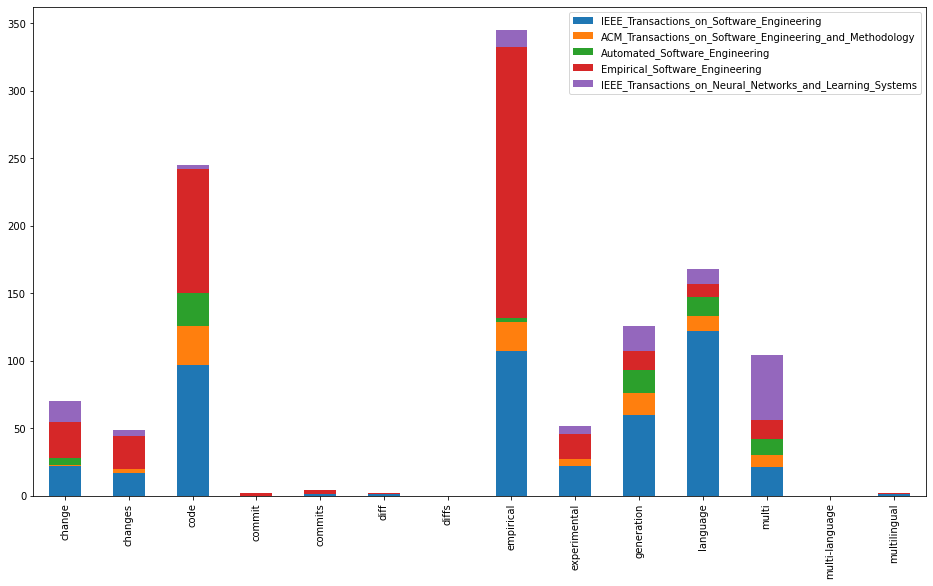

In [242]:
df.plot.bar(stacked=True, figsize=(16,9))

<AxesSubplot:>

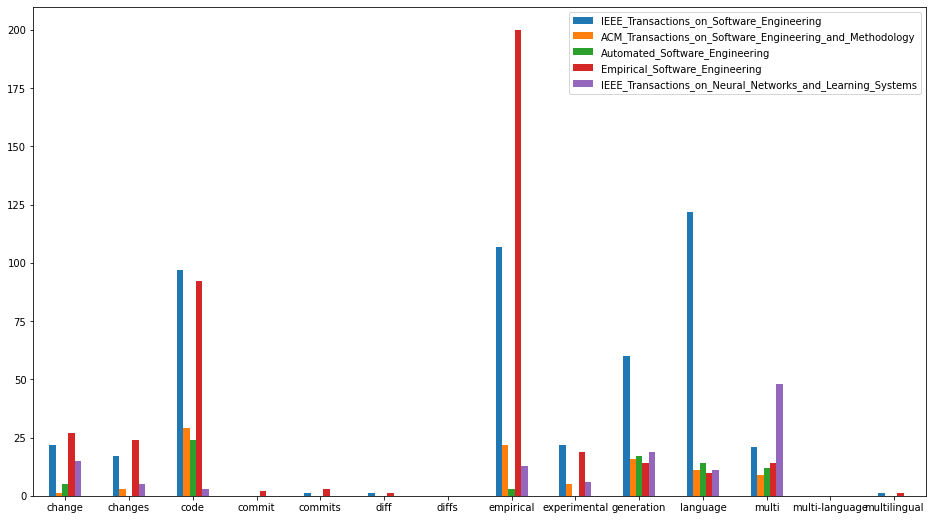

In [243]:
df.plot.bar(rot=0, figsize=(16,9))

## Titles of the papers with `commit` 

In [266]:
for item in result['Empirical_Software_Engineering']:
    if len(item['matched_titles']['commit']) != 0:
        print([i['title'] for i in item['matched_titles']['commit']])

['Code and commit metrics of developer productivity: a study on team leaders perceptions.']
['Correlations between bugginess and time-based commit characteristics.']


## Titles of the papers with both `change` and `code`

In [270]:
for journal in result.keys():
    for item in result[journal]:
        if len(item['matched_titles']['change']) != 0 and len(item['matched_titles']['code']) != 0:
            for each in [i['title'] for i in item['matched_titles']['change']]:
                print(each)

How Well Do Change Sequences Predict Defects? Sequence Learning from Software Changes.
Automating Change-Level Self-Admitted Technical Debt Determination.
Supporting Change Impact Analysis Using a Recommendation System: An Industrial Case Study in a Safety-Critical Context.
An Industrial Survey of Safety Evidence Change Impact Analysis Practice.
The Impact of API Change- and Fault-Proneness on the User Ratings of Android Apps.
Reducing Features to Improve Code Change-Based Bug Prediction.
Examining the Potentially Confounding Effect of Class Size on the Associations between Object-Oriented Metrics and Change-Proneness.
Visualizing Co-Change Information with the Evolution Radar.
Change Distilling: Tree Differencing for Fine-Grained Source Code Change Extraction.
Identifying Failure Causes in Java Programs: An Application of Change Impact Analysis.
Predicting the Probability of Change in Object-Oriented Systems.
Comparing High-Change Modules and Modules with the Highest Measurement Value